In [1]:
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
0   1        C3         3213            Rented          Individual         36   
1   2        C5         1117             Owned               Joint         75   
2   3        C5         3732             Owned          Individual         32   
3   4       C24         4378             Owned               Joint         52   
4   5        C8         2190            Rented          Individual         44   

   Lower_Age Is_Spouse Health Indicator Holding_Policy_Duration  \
0         36        No               X1                     14+   
1         22        No               X2                     NaN   
2         32        No              NaN                     1.0   
3         48        No               X1                     14+   
4         44        No               X2                     3.0   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  Response  
0                  3.0               22              11628.0         0  
1                  NaN               22              30510.0         0  
2                  1.0               19               7450.0         1  
3                  3.0               19              17780.0         0  
4                  1.0               16              10404.0         0

In [3]:
train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].fillna('0.0')
train['Holding_Policy_Type'] = train['Holding_Policy_Type'].fillna(0.0)
train.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration        0
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [4]:
test['Holding_Policy_Duration'] = test['Holding_Policy_Duration'].fillna('0.0')
test['Holding_Policy_Type'] = test['Holding_Policy_Type'].fillna(0.0)
test.isna().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration       0
Holding_Policy_Type           0
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [5]:
train.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration        0
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [6]:
train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].str.replace(r'[^\d.]+', '')
test['Holding_Policy_Duration'] = test['Holding_Policy_Duration'].str.replace(r'[^\d.]+', '')

In [7]:
check_df = train[train['Health Indicator'].notnull()]
check_df.shape

(39191, 14)

In [8]:
pd.value_counts(check_df['Health Indicator'])

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [9]:
train['Health Indicator'] = train['Health Indicator'].fillna('X1')
test['Health Indicator'] = test['Health Indicator'].fillna('X1')

In [10]:
train.drop('Region_Code', axis=1, inplace=True)
test.drop('Region_Code', axis=1, inplace=True)
# train.columns[]
cat_cols = list(train.select_dtypes(include=['object']).columns)
cat_cols

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Duration']

In [11]:
cat_cols_test = list(test.select_dtypes(include=['object']).columns)
cat_cols_test

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Duration']

In [12]:
df = pd.get_dummies(train, columns = cat_cols)
df_test = pd.get_dummies(test, columns = cat_cols_test)
df.head()

ID  Upper_Age  Lower_Age  Holding_Policy_Type  Reco_Policy_Cat  \
0   1         36         36                  3.0               22   
1   2         75         22                  0.0               22   
2   3         32         32                  1.0               19   
3   4         52         48                  3.0               19   
4   5         44         44                  1.0               16   

   Reco_Policy_Premium  Response  City_Code_C1  City_Code_C10  City_Code_C11  \
0              11628.0         0             0              0              0   
1              30510.0         0             0              0              0   
2               7450.0         1             0              0              0   
3              17780.0         0             0              0              0   
4              10404.0         0             0              0              0   

   ...  Holding_Policy_Duration_14  Holding_Policy_Duration_14.0  \
0  ...                           1                             0   
1  ...                           0                             0   
2  ...                           0                             0   
3  ...                           1                             0   
4  ...                           0                             0   

   Holding_Policy_Duration_2.0  Holding_Policy_Duration_3.0  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            1   

   Holding_Policy_Duration_4.0  Holding_Policy_Duration_5.0  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   Holding_Policy_Duration_6.0  Holding_Policy_Duration_7.0  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   Holding_Policy_Duration_8.0  Holding_Policy_Duration_9.0  
0                            0                            0  
1                            0                            0  
2                            0                            0  
3                            0                            0  
4                            0                            0  

[5 rows x 74 columns]

In [13]:
df.drop('ID', axis=1, inplace=True)
df_test.drop('ID', axis=1, inplace=True)
df.tail()

Upper_Age  Lower_Age  Holding_Policy_Type  Reco_Policy_Cat  \
50877         22         22                  0.0               18   
50878         27         27                  3.0                4   
50879         63         63                  1.0               12   
50880         71         49                  2.0               16   
50881         24         24                  3.0               18   

       Reco_Policy_Premium  Response  City_Code_C1  City_Code_C10  \
50877               7704.0         0             0              0   
50878               5408.0         0             0              0   
50879              11374.0         0             1              0   
50880              28179.2         1             1              0   
50881              11424.0         0             0              0   

       City_Code_C11  City_Code_C12  ...  Holding_Policy_Duration_14  \
50877              0              0  ...                           0   
50878              0              0  ...                           0   
50879              0              0  ...                           1   
50880              0              0  ...                           0   
50881              0              0  ...                           0   

       Holding_Policy_Duration_14.0  Holding_Policy_Duration_2.0  \
50877                             0                            0   
50878                             0                            0   
50879                             0                            0   
50880                             0                            1   
50881                             0                            1   

       Holding_Policy_Duration_3.0  Holding_Policy_Duration_4.0  \
50877                            0                            0   
50878                            0                            0   
50879                            0                            0   
50880                            0                            0   
50881                            0                            0   

       Holding_Policy_Duration_5.0  Holding_Policy_Duration_6.0  \
50877                            0                            0   
50878                            0                            0   
50879                            0                            0   
50880                            0                            0   
50881                            0                            0   

       Holding_Policy_Duration_7.0  Holding_Policy_Duration_8.0  \
50877                            0                            0   
50878                            1                            0   
50879                            0                            0   
50880                            0                            0   
50881                            0                            0   

       Holding_Policy_Duration_9.0  
50877                            0  
50878                            0  
50879                            0  
50880                            0  
50881                            0  

[5 rows x 73 columns]

In [14]:
columns = df.columns
tes_columns = df_test.columns

In [15]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = columns

In [16]:
x_test = df_test.values
x_test_scaled = min_max_scaler.fit_transform(x_test)
df_test = pd.DataFrame(x_test_scaled)
df_test.columns = tes_columns

In [17]:
df.head()

Upper_Age  Lower_Age  Holding_Policy_Type  Reco_Policy_Cat  \
0   0.315789   0.338983                 0.75         1.000000   
1   1.000000   0.101695                 0.00         1.000000   
2   0.245614   0.271186                 0.25         0.857143   
3   0.596491   0.542373                 0.75         0.857143   
4   0.456140   0.474576                 0.25         0.714286   

   Reco_Policy_Premium  Response  City_Code_C1  City_Code_C10  City_Code_C11  \
0             0.227609       0.0           0.0            0.0            0.0   
1             0.687356       0.0           0.0            0.0            0.0   
2             0.125881       1.0           0.0            0.0            0.0   
3             0.377401       0.0           0.0            0.0            0.0   
4             0.197807       0.0           0.0            0.0            0.0   

   City_Code_C12  ...  Holding_Policy_Duration_14  \
0            0.0  ...                         1.0   
1            0.0  ...                         0.0   
2            0.0  ...                         0.0   
3            0.0  ...                         1.0   
4            0.0  ...                         0.0   

   Holding_Policy_Duration_14.0  Holding_Policy_Duration_2.0  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   
3                           0.0                          0.0   
4                           0.0                          0.0   

   Holding_Policy_Duration_3.0  Holding_Policy_Duration_4.0  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          1.0                          0.0   

   Holding_Policy_Duration_5.0  Holding_Policy_Duration_6.0  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   Holding_Policy_Duration_7.0  Holding_Policy_Duration_8.0  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   Holding_Policy_Duration_9.0  
0                          0.0  
1                          0.0  
2                          0.0  
3                          0.0  
4                          0.0  

[5 rows x 73 columns]

In [18]:
X = df.drop('Response', axis=1)
y = df['Response']
X.head()

Upper_Age  Lower_Age  Holding_Policy_Type  Reco_Policy_Cat  \
0   0.315789   0.338983                 0.75         1.000000   
1   1.000000   0.101695                 0.00         1.000000   
2   0.245614   0.271186                 0.25         0.857143   
3   0.596491   0.542373                 0.75         0.857143   
4   0.456140   0.474576                 0.25         0.714286   

   Reco_Policy_Premium  City_Code_C1  City_Code_C10  City_Code_C11  \
0             0.227609           0.0            0.0            0.0   
1             0.687356           0.0            0.0            0.0   
2             0.125881           0.0            0.0            0.0   
3             0.377401           0.0            0.0            0.0   
4             0.197807           0.0            0.0            0.0   

   City_Code_C12  City_Code_C13  ...  Holding_Policy_Duration_14  \
0            0.0            0.0  ...                         1.0   
1            0.0            0.0  ...                         0.0   
2            0.0            0.0  ...                         0.0   
3            0.0            0.0  ...                         1.0   
4            0.0            0.0  ...                         0.0   

   Holding_Policy_Duration_14.0  Holding_Policy_Duration_2.0  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   
3                           0.0                          0.0   
4                           0.0                          0.0   

   Holding_Policy_Duration_3.0  Holding_Policy_Duration_4.0  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          1.0                          0.0   

   Holding_Policy_Duration_5.0  Holding_Policy_Duration_6.0  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   Holding_Policy_Duration_7.0  Holding_Policy_Duration_8.0  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   Holding_Policy_Duration_9.0  
0                          0.0  
1                          0.0  
2                          0.0  
3                          0.0  
4                          0.0  

[5 rows x 72 columns]

In [19]:
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Response, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34090, 72) (16792, 72) (34090,) (16792,)


In [21]:
rf_clf = RandomForestClassifier(max_depth=6, n_estimators=400, random_state=0)
rf_clf.fit(X_train, y_train)
prediction = rf_clf.predict(X_test)
y_pred = rf_clf.predict_proba(X_test)[:,1]

In [22]:
roc_auc_score(y_test, y_pred)

0.5914705755685891

In [24]:
print('Accuracy:',format(accuracy_score(y_test, prediction)*100))
print('AUC:',format(roc_auc_score(y_test, y_pred)*100))
print('Classification_report:',classification_report(y_test, prediction))

Accuracy: 75.64911862791806
AUC: 59.147057556858904
Classification_report:               precision    recall  f1-score   support

         0.0       0.76      1.00      0.86     12703
         1.0       0.00      0.00      0.00      4089

    accuracy                           0.76     16792
   macro avg       0.38      0.50      0.43     16792
weighted avg       0.57      0.76      0.65     16792



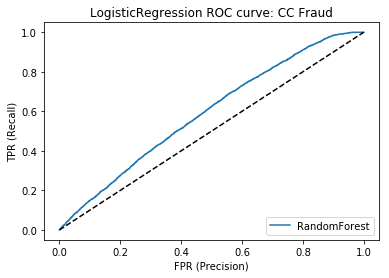

Area under curve (AUC):  0.5914705755685891


In [25]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.title('LogisticRegression ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr, label='RandomForest')
plt.legend(loc='lower right')
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr)) #roc_auc_score(y_test, y_score)

### Naive Bayes

In [26]:
nbClf = GaussianNB(priors=None, var_smoothing=1e-09)
nbClf.fit(X_train, y_train)
prediction = nbClf.predict(X_test)
y_pred = nbClf.predict_proba(X_test)[:,1]

In [27]:
roc_auc_score(y_test, y_pred)

0.5329968097264042

In [28]:
print('Accuracy:',format(accuracy_score(y_test, prediction)*100))
print('AUC:',format(roc_auc_score(y_test, y_pred)*100))
print('Classification_report:',classification_report(y_test, prediction))

Accuracy: 67.663172939495
AUC: 53.29968097264042
Classification_report:               precision    recall  f1-score   support

         0.0       0.76      0.84      0.80     12703
         1.0       0.24      0.15      0.19      4089

    accuracy                           0.68     16792
   macro avg       0.50      0.50      0.49     16792
weighted avg       0.63      0.68      0.65     16792



In [29]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.title('LogisticRegression ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr, label='Naive Bayes')
plt.legend(loc='lower right')
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr)) #roc_auc_score(y_test, y_score)

Area under curve (AUC):  0.5329968097264042


### Logistic Regression

In [30]:
lg_clf = lrClf = LogisticRegression(
    penalty='l2',
    solver='newton-cg',
    random_state=42,
    C=1e9                           # disable sklearn regularization 
)
lg_clf.fit(X_train, y_train)
prediction = lg_clf.predict(X_test)
y_pred = lg_clf.predict_proba(X_test)[:,1]

In [31]:
roc_auc_score(y_test, y_pred)

0.5645059667536261

In [32]:
print('Accuracy:',format(accuracy_score(y_test, prediction)*100))
print('AUC:',format(roc_auc_score(y_test, y_pred)*100))
print('Classification_report:',classification_report(y_test, prediction))

Accuracy: 75.64911862791806
AUC: 56.450596675362604
Classification_report:               precision    recall  f1-score   support

         0.0       0.76      1.00      0.86     12703
         1.0       0.00      0.00      0.00      4089

    accuracy                           0.76     16792
   macro avg       0.38      0.50      0.43     16792
weighted avg       0.57      0.76      0.65     16792



In [33]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.title('LogisticRegression ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr, label='Logistic Regression')
plt.legend(loc='lower right')
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr)) #roc_auc_score(y_test, y_score)

Area under curve (AUC):  0.5645059667536261


### SVM

In [ ]:
svmClf = SVC(kernel='linear', C=1E8, probability=True, random_state=42)
svmClf.fit(X_train, y_train)
prediction = svmClf.predict(X_test)
y_pred = svmClf.predict_proba(X_test)[:,1]

In [ ]:
roc_auc_score(y_test, y_pred)

In [ ]:
print('Accuracy:',format(accuracy_score(y_test, prediction)*100))
print('AUC:',format(roc_auc_score(y_test, y_pred)*100))
print('Classification_report:',classification_report(y_test, prediction))

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.title('LogisticRegression ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr, label='SVM')
plt.legend(loc='lower right')
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr)) #roc_auc_score(y_test, y_score)

### LightGBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbmClf = SVC(kernel='linear', C=1E8, probability=True, random_state=42)
lgbmClf.fit(X_train, y_train)
prediction = lgbmClf.predict(X_test)
y_pred = lgbmClf.predict_proba(X_test)[:,1]

In [ ]:
roc_auc_score(y_test, y_pred)

In [ ]:
print('Accuracy:',format(accuracy_score(y_test, prediction)*100))
print('AUC:',format(roc_auc_score(y_test, y_pred)*100))
print('Classification_report:',classification_report(y_test, prediction))

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.title('LogisticRegression ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr, label='LGBM')
plt.legend(loc='lower right')
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr)) #roc_auc_score(y_test, y_score)

### XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgbClf = XGBClassifier(max_depth=6, n_estimators=400)
xgbClf.fit(X_train, y_train)
prediction = xgbClf.predict(X_test)
y_pred = xgbClf.predict_proba(X_test)[:,1]

In [ ]:
roc_auc_score(y_test, y_pred)

In [ ]:
print('Accuracy:',format(accuracy_score(y_test, prediction)*100))
print('AUC:',format(roc_auc_score(y_test, y_pred)*100))
print('Classification_report:',classification_report(y_test, prediction))

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.title('LogisticRegression ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr, label='XGB')
plt.legend(loc='lower right')
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr)) #roc_auc_score(y_test, y_score)